In [1]:
import torch 
import torch.nn as nn
import pygame
import os
import random

pygame 2.5.2 (SDL 2.28.2, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [9]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu') 
device

device(type='cuda')

In [2]:
import os
import numpy as np
# Specify the folder path containing the .npy files
folder_path = "Quick_Draw_Data"

# List the .npy files in the folder
file_names = os.listdir(folder_path)
file_paths = [file_name for file_name in file_names if file_name.endswith('.npy')]


In [10]:
import os
import numpy as np
# Specify the folder path containing the .npy files
folder_path = "Quick_Draw_Data"

# List the .npy files in the folder
file_names = os.listdir(folder_path)
file_paths = [file_name for file_name in file_names if file_name.endswith('.npy')]

# Load the .npy files and store them in a dictionary
data_dict = {}
samples=10000
for i in range(40):
    data = np.load(folder_path + "/" + file_paths[i])[:samples]
    # label = np.empty((data.shape[0],1),dtype=object)
    # astr = file_paths[i][18:-4]
    label = np.empty((data.shape[0],1),dtype=float)
    astr=i
    for k in range(label.shape[0]):
        for j in range(label.shape[1]):
            label[k][j] = astr
    data = np.hstack((data,label))
    data_dict[i] = data


In [3]:
look_up_table={}
for i in range(40):
    look_up_table[i] = file_paths[i][18:-4]
print(look_up_table)

{0: 'airplane', 1: 'apple', 2: 'axe', 3: 'basketball', 4: 'bed', 5: 'bicycle', 6: 'bowtie', 7: 'bread', 8: 'bucket', 9: 'butterfly', 10: 'cactus', 11: 'cake', 12: 'candle', 13: 'carrot', 14: 'circle', 15: 'clock', 16: 'cloud', 17: 'crayon', 18: 'crown', 19: 'cup', 20: 'diamond', 21: 'donut', 22: 'ear', 23: 'envelope', 24: 'eye', 25: 'eyeglasses', 26: 'finger', 27: 'fish', 28: 'flower', 29: 'fork', 30: 'hammer', 31: 'hat', 32: 'headphones', 33: 'hockey stick', 34: 'ice cream', 35: 'key', 36: 'leaf', 37: 'moon', 38: 'mountain', 39: 'mushroom'}


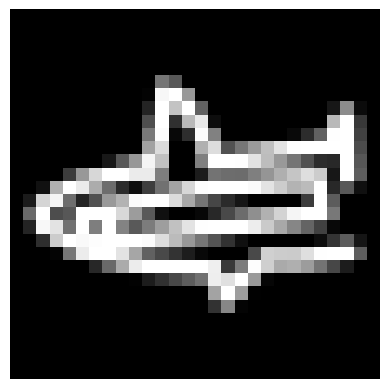

In [12]:
import matplotlib.pyplot as plt

# Specify the index of the sample you want to plot
sample_index = 0

# Access the sample from the data dictionary
sample = data_dict[0][100, :-1].astype(float)  # Exclude the label from the sample

# Reshape the sample to the image dimensions (assuming it's a 28x28 image)
image = sample.reshape((28, 28))

# Plot the image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()



In [13]:
train = []
test = []

for key, value in data_dict.items():
    # print(value[0])
    train.extend(value[:8000])  # First 8000 samples for training
    test.extend(value[8000:10000])  # Remaining 2000 samples for testing
print("Train set size:", len(train))
print("Test set size:", len(test))

Train set size: 320000
Test set size: 80000


In [14]:
num_classes = 40
learning_rate = 0.01
num_epochs = 20
batch_size=50

In [15]:
train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size,shuffle=True)
test_loader= torch.utils.data.DataLoader(test, batch_size=batch_size, shuffle=True)

In [4]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3,padding=1)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3,padding=1)
        self.fc1 = nn.Linear(16 * 7 * 7, 120)  
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 40)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))  
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
# net.to(device)

In [17]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(net.parameters(), lr=0.001)

In [18]:
outputs = torch.tensor([])
for epoch in range(20):  # loop over the dataset multiple times
    net.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs= data[:,:784].float()
        inputs = inputs.view(-1, 1, 28, 28)  # Reshape the input tensor
        # inputs=inputs.to(device)
        labels=data[:,784]
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        # print(outputs)
        loss = criterion(outputs, labels.long())
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    # print statistics at the end of each epoch
    print(f'Epoch [{epoch + 1}/20], Loss: {running_loss / len(train_loader):.3f}')

print('Finished Training')

Epoch [1/20], Loss: 0.835
Epoch [2/20], Loss: 0.613
Epoch [3/20], Loss: 0.562
Epoch [4/20], Loss: 0.532
Epoch [5/20], Loss: 0.512
Epoch [6/20], Loss: 0.499
Epoch [7/20], Loss: 0.490
Epoch [8/20], Loss: 0.480
Epoch [9/20], Loss: 0.473
Epoch [10/20], Loss: 0.467
Epoch [11/20], Loss: 0.461
Epoch [12/20], Loss: 0.455
Epoch [13/20], Loss: 0.452
Epoch [14/20], Loss: 0.448
Epoch [15/20], Loss: 0.443
Epoch [16/20], Loss: 0.440
Epoch [17/20], Loss: 0.435
Epoch [18/20], Loss: 0.432
Epoch [19/20], Loss: 0.429
Epoch [20/20], Loss: 0.428
Finished Training


In [19]:
PATH = './quick_draw_cnn.pth'
torch.save(net.state_dict(), PATH)

In [20]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    net.eval()
    for data in test_loader:
        inputs= data[:,:784].float()
        inputs = inputs.view(-1, 1, 28, 28)  # Reshape the input tensor
        # inputs=inputs.to(device)
        labels=data[:,784]
        # calculate outputs by running images through the network
        outputs = net(inputs)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the {len(test)} test images: {100 * correct / total} %')


Accuracy of the network on the 80000 test images: 85.4925 %


In [21]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in look_up_table.values()}
total_pred = {classname: 0 for classname in look_up_table.values()}

# again no gradients needed
with torch.no_grad():
    for data in test_loader:
        inputs= data[:,:784].float()
        inputs = inputs.view(-1, 1, 28, 28)  # Reshape the input tensor
        # inputs=inputs.to(device)
        labels=data[:,784]    
        outputs = net(inputs)   
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            # if label.item() == 0:
                # print("predicted: ", prediction.item())
            if label == prediction:
                correct_pred[look_up_table[label.item()]] += 1
            total_pred[look_up_table[label.item()]] += 1

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    total_count = total_pred[classname]
    if total_count == 0:
        accuracy = 0.0  # If no instances of this class in test dataset, set accuracy to 0
    else:
        accuracy = 100 * float(correct_count) / total_count
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')


Accuracy for class: airplane is 88.5 %
Accuracy for class: apple is 92.8 %
Accuracy for class: axe   is 76.5 %
Accuracy for class: basketball is 82.8 %
Accuracy for class: bed   is 86.8 %
Accuracy for class: bicycle is 92.6 %
Accuracy for class: bowtie is 85.8 %
Accuracy for class: bread is 72.7 %
Accuracy for class: bucket is 88.0 %
Accuracy for class: butterfly is 88.4 %
Accuracy for class: cactus is 84.5 %
Accuracy for class: cake  is 88.8 %
Accuracy for class: candle is 86.0 %
Accuracy for class: carrot is 85.4 %
Accuracy for class: circle is 90.0 %
Accuracy for class: clock is 92.3 %
Accuracy for class: cloud is 83.5 %
Accuracy for class: crayon is 76.7 %
Accuracy for class: crown is 89.8 %
Accuracy for class: cup   is 82.1 %
Accuracy for class: diamond is 84.8 %
Accuracy for class: donut is 91.8 %
Accuracy for class: ear   is 81.7 %
Accuracy for class: envelope is 95.0 %
Accuracy for class: eye   is 89.4 %
Accuracy for class: eyeglasses is 86.2 %
Accuracy for class: finger is 77.

In [5]:
net = Net()
net.load_state_dict(torch.load('./quick_draw_cnn.pth'))

<All keys matched successfully>

In [12]:
# Initialize PyGame
pygame.init()

# Set up the drawing window
canvas_width, canvas_height = 600, 600
canvas = pygame.display.set_mode((canvas_width, canvas_height))

random_number = random.randint(0, 39)

pygame.display.set_caption(f"Draw {look_up_table[random_number]} Press ctrl+c to clear canvas & close to save")

# Colors
BLACK = (0, 0, 0)
WHITE = (255, 255, 255)

# Function to clear the canvas
def clear_canvas():
    canvas.fill(WHITE)
    pygame.display.flip()  # Update the display to show the cleared canvas

# Game loop
drawing = False
last_pos = (0, 0)
canvas.fill(WHITE)

running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

        elif event.type == pygame.MOUSEBUTTONDOWN:
            drawing = True
            last_pos = event.pos

        elif event.type == pygame.MOUSEBUTTONUP:
            drawing = False

        elif event.type == pygame.MOUSEMOTION:
            if drawing:
                mouse_pos = event.pos
                pygame.draw.line(canvas, BLACK, last_pos, mouse_pos, 5)  # Draw line
                last_pos = mouse_pos

        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_c and pygame.key.get_mods() & pygame.KMOD_CTRL:
                clear_canvas()

    pygame.display.flip()

# Save the canvas as an image
image_path = "drawn_image.jpg"
pygame.image.save(canvas, image_path)

# Clean up
pygame.quit()

print(f"Image saved at: {os.path.abspath(image_path)}")


Image saved at: /mnt/c/Users/rushi/Desktop/IIT_Bombay/Academics/Sem_4/ML/Skribble_Buddy/drawn_image.jpg


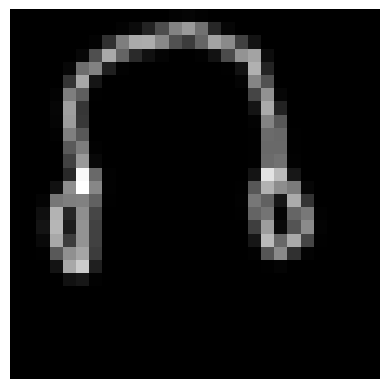

In [13]:
from PIL import Image
from skimage.transform import resize
import numpy as np

# Load the image
image = Image.open(image_path)
#Convert to grayscale
gray_image = image.convert('L')
# print(np.min(gray_image))

# Resize the image to 28x28 using skimage
resized_image = resize(np.array(gray_image), (28, 28), anti_aliasing=True)

# Convert the image to a numpy array and normalize pixel values

bitmap = (np.ones(resized_image.shape)-np.array(resized_image))
max_val = np.max(bitmap)
if max_val != 0:
    bitmap = bitmap*255/max_val

import matplotlib.pyplot as plt

# Plot the numpy array as an image

plt.imshow(bitmap, cmap='gray')  # cmap='gray' for grayscale images

plt.axis('off')  # Turn off axis
plt.show()

In [14]:
bitmap_tensor = torch.Tensor(bitmap).float()  # Convert to float tensor
bitmap_input = bitmap_tensor.view(-1, 1, 28, 28)   # Flatten to 1D tensor

# Pass the tensor to the network
outputs = net(bitmap_input)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', look_up_table[predicted.item()])


Predicted:  headphones
